In [1]:
#https://graphviz.org/
#graphviz에서 windows 기반 graphviz-2.49.3 (64-bit) EXE installer [sha256] 다운
#add graphviz to the system path for current user 이후 설치

#환경변수 등록되었는지 확인
#C:\Program Files\Graphviz\bin

#설치가 완료되었다면 cmd 관리자 권한으로 실행 후 dot -c 실행

#cmd에서 conda activate ml로 들어간 후
#pip install graphviz로 설치

In [2]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=0)

In [3]:
from sklearn.tree import DecisionTreeClassifier

# 모델생성
tree = DecisionTreeClassifier(random_state=0)

# 학습
tree.fit(X_train, y_train)

# 추론
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
#max_depth 미적용
print('max depth: None')
print("Train 정확도 : ", accuracy_score(y_train, pred_train))
print("Test 정확도 : ", accuracy_score(y_test, pred_test))
#과적합(오버피팅) 쓸 수는 있는데 조금 더 튜닝할 여지가 있는 모델로 보임

max depth: None
Train 정확도 :  1.0
Test 정확도 :  0.9020979020979021


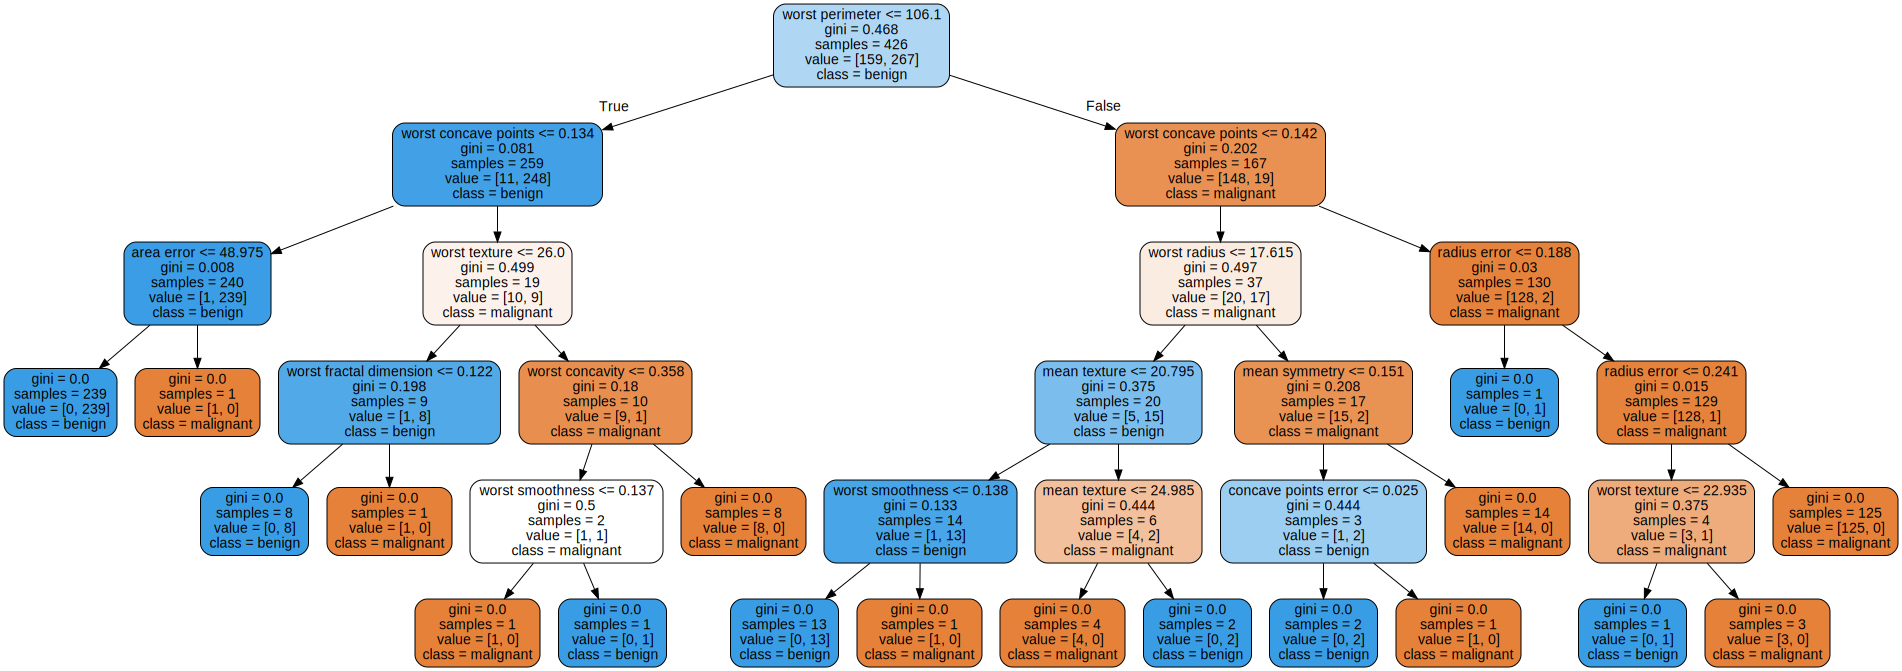

In [6]:
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree, 
                               out_file=None, 
                               feature_names=cancer.feature_names, 
                               class_names=cancer.target_names, 
                               rounded=True, filled=True))
graph

In [ ]:
#해석하기
worst smoothness <= 0.137 #질문
-----이전 노드 질문의 결과------
gini = 0.5 # 불순도 계산 결과 #한쪽 클래스가 많을 수록 순도가 높고 다른 클래스도 섞일 수록 불순도가 높음 0.5면 반반씩 있는것 
           # 불순도가 가장 낮은 방향으로 질문해나감
samples =2  #현재 노드의 샘플수
value = [1,1] #클래스 별 샘플 갯수
class = malignan #다수 클래스의 label

#흰색 그래프는 섞인 것
#왼쪽은 true 오른쪽은 false
#어느 한쪽이 0이 될때까지 진행

#너무 train set에 적합한 형태로 학습하면 과대적합이 일어날 수 있으니 어느정도 분류가 적당히 된 상태에서 멈추는 것이 좋음


In [8]:
#max_depth =1 적용

from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC

# 모델생성
tree = DecisionTreeClassifier(random_state=0, max_depth=1)

# 학습
tree.fit(X_train, y_train)

# 추론
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

from sklearn.metrics import accuracy_score
print('max depth: None')
print("Train 정확도 : ", accuracy_score(y_train, pred_train))
print("Test 정확도 : ", accuracy_score(y_test, pred_test))
#과적합(오버피팅) 쓸 수는 있는데 조금 더 튜닝할 여지가 있는 모델로 보임

max depth: None
Train 정확도 :  0.9295774647887324
Test 정확도 :  0.8881118881118881


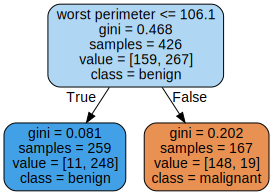

In [9]:
#max_depth =1 적용

from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree, 
                               out_file=None, 
                               feature_names=cancer.feature_names, 
                               class_names=cancer.target_names, 
                               rounded=True, filled=True))
graph

#과소적합 depth1적용보단 미적용이 나음

In [11]:
#max_depth =3 적용

from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC

# 모델생성
tree = DecisionTreeClassifier(random_state=0, max_depth=3)

# 학습
tree.fit(X_train, y_train)

# 추론
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

from sklearn.metrics import accuracy_score
print('max depth: None')
print("Train 정확도 : ", accuracy_score(y_train, pred_train))
print("Test 정확도 : ", accuracy_score(y_test, pred_test))
#과적합(오버피팅) 쓸 수는 있는데 조금 더 튜닝할 여지가 있는 모델로 보임

max depth: None
Train 정확도 :  0.9765258215962441
Test 정확도 :  0.916083916083916


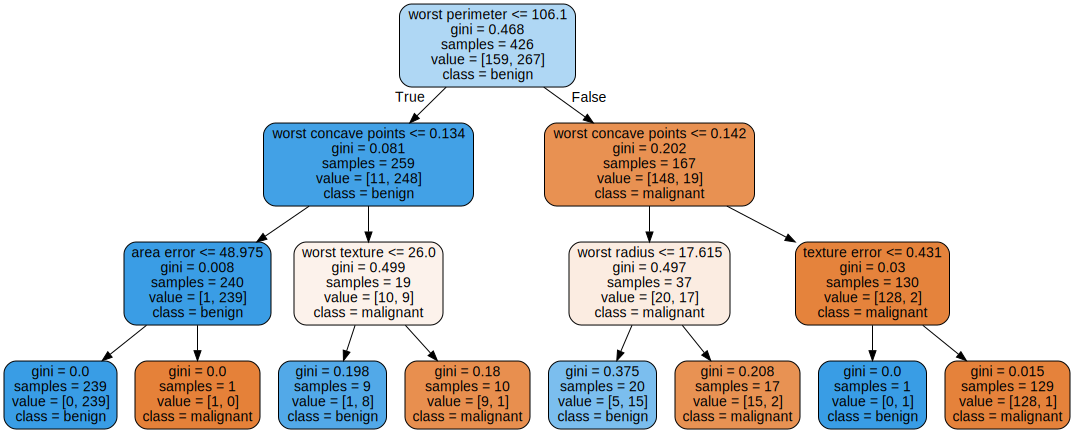

In [12]:
#max_depth =3 적용

from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree, 
                               out_file=None, 
                               feature_names=cancer.feature_names, 
                               class_names=cancer.target_names, 
                               rounded=True, filled=True))
graph

#validation set 정확도는 더 올라감
#세가지 중에선 지금 모델이 제일 나음
#train은 떨어졌지만 test 는 올라갔음.
#max_depth = 3인것이 가장 일반화된 것

#max_depth=none 오버피팅
#max_depth=1 언더피팅

#항상 기준은 test_정확도
#if test 정확도가 비슷하다면 train 정확도와 차이가 별로 안나는 것이 나음


In [ ]:
#리프노드 : 맨 아래에 더이상 가지를 치지 않는 노드 (class 갯수가 하나라도 0인 노드)
"""
만약 max_leaf modes가 5라면
 0 0 0 0 4개
0 0 0 0 0  +a 로 5개째가 포함된 부분까지 하고 멈춤


min_samples_leaf=50일 때
질문을 통해 True와 False로 나뉜 경우 sample이 50개가 되었다면 리프노드로 간주하고 멈춤
질문을 더 할 수 있는 상황이더라도 멈춤

"""

In [13]:
#최적의 하이퍼파라미터 찾기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import plot as plt

In [14]:
max_depth_candidates = range(1,6)

train_acc_list = []
test_acc_list = []

for depth in max_depth_candidates: #1~5
    #모델 생성 + 학습
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    
    #train_test set으로 추론
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    
    #평가결과를 list에 추가
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [16]:
import pandas as pd
result_df = pd.DataFrame({'Train Acc':train_acc_list, 
                          'Test Acc':test_acc_list}, 
                         index=max_depth_candidates
                        )

#df.rename_axis(): 축의 이름 (index/column label)을 지정/변경
result_df.rename_axis('Max Depth', inplace=True)
result_df

,Train Acc,Test Acc
Max Depth,,
1,0.929577,0.888112
2,0.931925,0.888112
3,0.976526,0.916084
4,0.985915,0.909091
5,1.000000,0.902098


In [ ]:
result_df = pd.DataFrame({'Train Acc':train_acc_list, 
                          'Test Acc':test_acc_list}, 
                         index=max_depth_candidates
                        )

#df.rename_axis(): 축의 이름 (index/column label)을 지정/변경
result_df.rename_axis(index='Max Depth', columns='dataset' inplace=True)
#train Acc Test Acc 가 Max Depth라는 것
result_df

In [25]:
#개인
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X= cancer.data
y= cancer.target
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, random_state=0)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, pred_train_tree))
print(accuracy_score(y_test, pred_test_tree))

1.0
0.9020979020979021


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay 
from sklearn.metrics import roc_curve, RocCurveDisplay 
from sklearn.metrics import roc_auc_score, average_precision_score


In [37]:
#확률예측은 데이터셋 하나만 넣고 한다.
pred_train_tree_prob = tree.predict_proba(X_train)[:,1]
pred_test_tree_prob = tree.predict_proba(X_test)[:,1]

In [44]:
#추론

print(accuracy_score(y_train, pred_train_tree))
print(precision_score(y_train, pred_train_tree))
print(recall_score(y_train, pred_train_tree))
print(f1_score(y_train, pred_train_tree))

print(average_precision_score(y_train,pred_train_tree_prob))
print(roc_auc_score(y_train, pred_train_tree_prob))

1.0
1.0
1.0
1.0
1.0
1.0


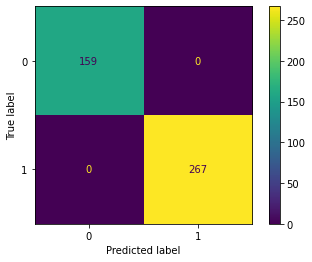

In [46]:
cm = confusion_matrix(y_train, pred_train_tree)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

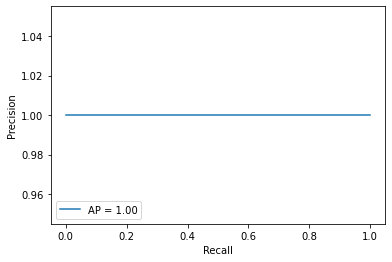

In [54]:
#precision recall curve 
pre, recal, th_ = precision_recall_curve(y_train, pred_train_tree_prob)
ap_score = average_precision_score(y_train, pred_train_tree_prob)
disp = PrecisionRecallDisplay(pre, recal, average_precision=ap_score)
disp.plot()

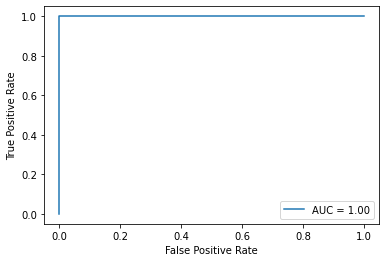

In [56]:
#roc_curve
fpr, tpr, _ = roc_curve(y_train, pred_train_tree_prob)
auc_score = roc_auc_score(y_train, pred_train_tree_prob)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
disp.plot()

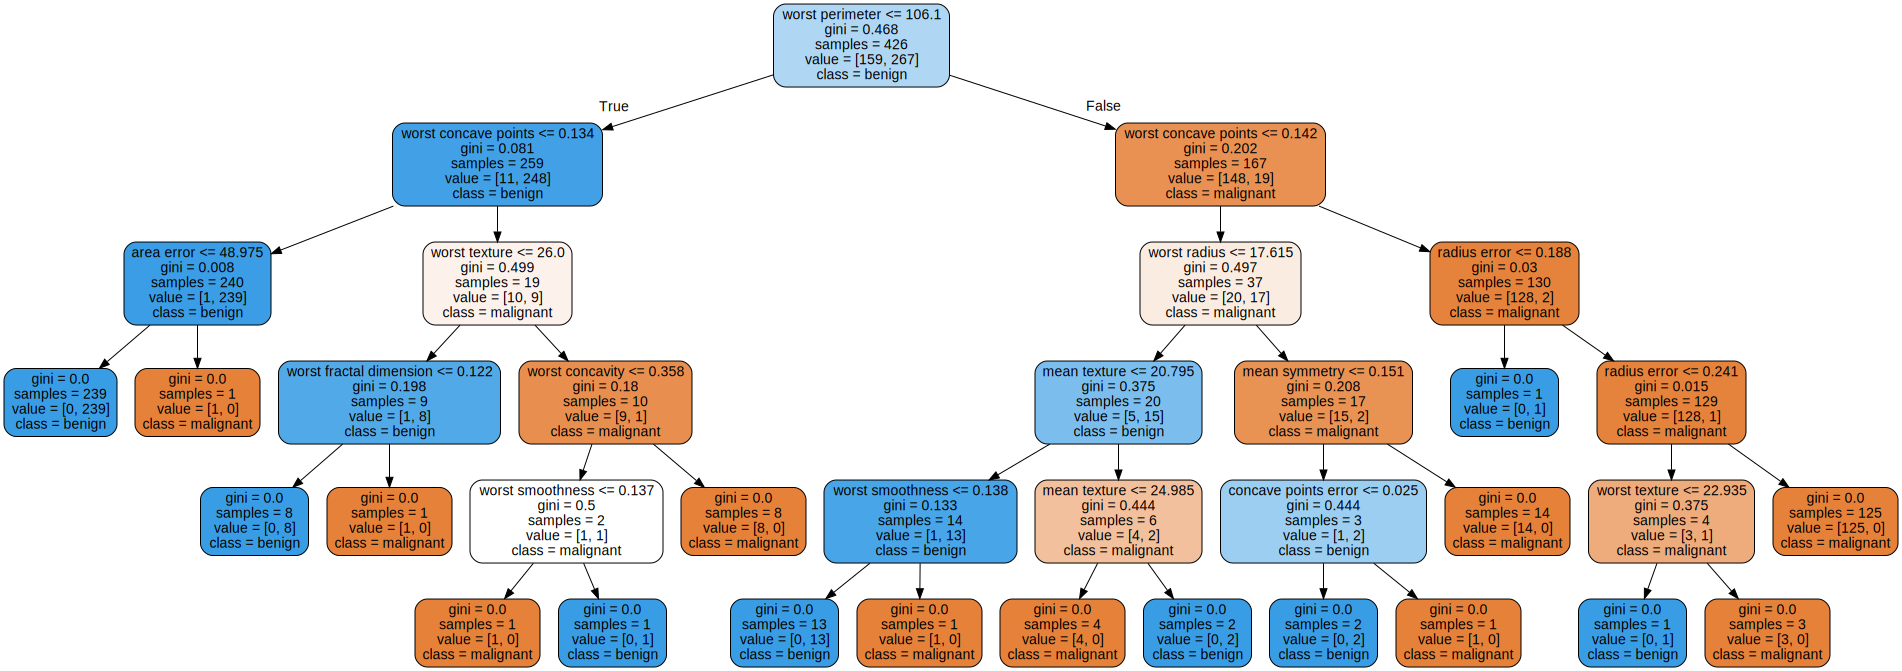

In [60]:
#트리구조 시각화 하기
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz (tree, 
                               out_file=None,
                               feature_names = cancer.feature_names,
                               class_names = cancer.target_names,
                               rounded=True, filled=True))
graph

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [62]:
max_depth_candidates = range(1,6)

train_acc_list = []
test_acc_list = []

for depth in max_depth_candidates: #1~5
    #모델 생성 + 학습
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    
    #train_test set으로 추론
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    
    #평가결과를 list에 추가
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [65]:
import pandas as pd

result_df = pd.DataFrame({'Train Acc': train_acc_list,
                         'Test Acc': test_acc_list},
                        index=max_depth_candidates)

result_df.rename_axis('Max Depth', inplace=True)
#result_df.rename_axis(index = 'Max Depth', columns='dataset', inplace=True)
result_df

,Train Acc,Test Acc
Max Depth,,
1,0.929577,0.888112
2,0.931925,0.888112
3,0.976526,0.916084
4,0.985915,0.909091
5,1.000000,0.902098


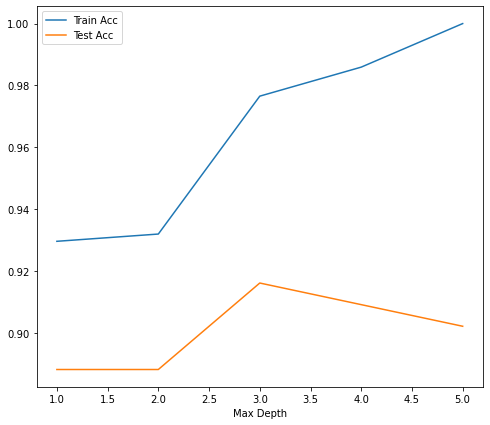

In [66]:
result_df.plot(figsize=(8,7))
plt.show()

In [67]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [74]:
#gridsearchcv
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=0)

#파라미터 후보들 반드시 딕셔너리 형태
param_grid = {'max_depth': [None, 1,2,3,4,5],
             'max_leaf_nodes': [3,5,7,9]}

grid_search = GridSearchCV(tree, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)
                                                      

In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [3, 5, 7, 9]},
             scoring='accuracy')

In [76]:
grid_search.cv_results_

{'mean_fit_time': array([0.00259185, 0.00338979, 0.00418787, 0.00438738, 0.00199418,
        0.0015954 , 0.00180702, 0.00119667, 0.00199494, 0.00199499,
        0.00199471, 0.00199385, 0.00239887, 0.0019887 , 0.00239329,
        0.00219355, 0.00199461, 0.00239325, 0.00219388, 0.00279226,
        0.00199456, 0.00219393, 0.00239353, 0.00299163]),
 'std_fit_time': array([4.88811234e-04, 1.19707585e-03, 3.98969778e-04, 4.88616690e-04,
        5.72204590e-07, 4.88928407e-04, 3.89648889e-04, 3.99089127e-04,
        9.72560790e-07, 1.04033586e-06, 9.48893964e-07, 2.33601546e-07,
        4.83750782e-04, 1.15895956e-05, 4.88383042e-04, 3.98826599e-04,
        2.61174468e-07, 4.88519261e-04, 3.98778987e-04, 3.98826685e-04,
        2.33601546e-07, 3.98993531e-04, 4.88577726e-04, 4.37028474e-07]),
 'mean_score_time': array([0.00139647, 0.00039902, 0.00019941, 0.00039907, 0.00039902,
        0.00040498, 0.00019331, 0.00019937, 0.00039873, 0.00039878,
        0.00039868, 0.        , 0.00019369, 0.00

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [None,0,1,2,3,4,5,6,7,8,9,10], 'max_leaf_nodes': [10,20,30,40,50]}

grid_search = GridSearchCV(tree,
                          param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)


In [84]:
grid_search.fit(X_train, y_train)

C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [88]:
grid_search.cv_results_

{'mean_fit_time': array([0.00278554, 0.00238957, 0.00279255, 0.00299129, 0.00258517,
        0.0003993 , 0.00060372, 0.00039883, 0.00039902, 0.00059867,
        0.00099196, 0.00099607, 0.00100307, 0.00099716, 0.00099683,
        0.00139589, 0.00179434, 0.00099554, 0.00199437, 0.00219398,
        0.00199366, 0.00219173, 0.00219469, 0.00219455, 0.00199685,
        0.00200562, 0.0019968 , 0.00238795, 0.00240011, 0.00299206,
        0.00259218, 0.00218902, 0.00259323, 0.00219517, 0.00279179,
        0.00219383, 0.00259194, 0.00219297, 0.00259767, 0.00199509,
        0.00219932, 0.00259347, 0.00239277, 0.00239277, 0.00239353,
        0.00198922, 0.00279198, 0.00219421, 0.00278721, 0.00199361,
        0.00259099, 0.00279403, 0.00278873, 0.00279088, 0.00259337,
        0.00279112, 0.00239291, 0.00278568, 0.00319266, 0.00279117]),
 'std_fit_time': array([3.95837273e-04, 4.82995125e-04, 3.99510733e-04, 1.81646795e-05,
        4.85621998e-04, 4.89045208e-04, 4.93032060e-04, 4.88460855e-04,
     

In [89]:
df= pd.DataFrame(grid_search.cv_results_)
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_leaf_nodes', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [93]:
df[df.columns[6:]].sort_values('rank_test_score')

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
59,"{'max_depth': 10, 'max_leaf_nodes': 50}",0.930233,0.964706,0.858824,0.941176,0.976471,0.934282,0.041142,1
33,"{'max_depth': 5, 'max_leaf_nodes': 40}",0.930233,0.964706,0.870588,0.941176,0.964706,0.934282,0.034560,1
58,"{'max_depth': 10, 'max_leaf_nodes': 40}",0.930233,0.964706,0.858824,0.941176,0.976471,0.934282,0.041142,1
34,"{'max_depth': 5, 'max_leaf_nodes': 50}",0.930233,0.964706,0.870588,0.941176,0.964706,0.934282,0.034560,1
36,"{'max_depth': 6, 'max_leaf_nodes': 20}",0.930233,0.964706,0.858824,0.941176,0.976471,0.934282,0.041142,1
37,"{'max_depth': 6, 'max_leaf_nodes': 30}",0.930233,0.964706,0.858824,0.941176,0.976471,0.934282,0.041142,1
38,"{'max_depth': 6, 'max_leaf_nodes': 40}",0.930233,0.964706,0.858824,0.941176,0.976471,0.934282,0.041142,1
39,"{'max_depth': 6, 'max_leaf_nodes': 50}",0.930233,0.964706,0.858824,0.941176,0.976471,0.934282,0.041142,1
41,"{'max_depth': 7, 'max_leaf_nodes': 20}",0.930233,0.964706,0.858824,0.941176,0.976471,0.934282,0.041142,1
42,"{'max_depth': 7, 'max_leaf_nodes': 30}",0.930233,0.964706,0.858824,0.941176,0.976471,0.934282,0.041142,1


In [94]:
grid_search.best_score_

0.934281805745554

In [95]:
grid_search.best_params_

{'max_depth': None, 'max_leaf_nodes': 20}

In [102]:
best_model =grid_search.best_estimator_

In [103]:
accuracy_score(y_test, best_model.predict(X_test))

0.916083916083916

In [100]:
accuracy_score(y_test, grid_search.predict(X_test))

0.916083916083916

In [1]:
#RandomizedSearchCV

In [4]:
import numpy as np

from sklearn.model_selection import RandimizedSearchCV
from sklern.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
param_grid = {
    "max_depth":range(1,11),
    "max_leaf_nodes": range(3,31,3),
    "criterion": ["gini", "entropy"]
}

n_iter_search =50
random_search = RandomizedSearchCV(tree,
                                  param_distributions = param_grid,
                                   n_iter = n_iter_search,
                                   cv=3,
                                   n_jobs=-1
                                  )

In [13]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 11),
                                        'max_leaf_nodes': range(3, 31, 3)})

In [15]:
random_search.best_score_

0.981981981981982

In [20]:
random_search.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6, random_state=0)

In [18]:
random_search.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6, random_state=0)

In [22]:
accuracy_score(y_test, random_search.best_estimator_.predict(X_test))

0.9473684210526315

In [23]:
accuracy_score(y_test, random_search.predict(X_test))

0.9473684210526315

In [24]:
#
result_dict = random_search.cv_results_
result_dict

{'mean_fit_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01040999, 0.        ,
        0.        , 0.        , 0.        , 0.00520706, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00520738, 0.00520738,
        0.00520738, 0.00520738, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'std_fit_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00736098, 0.        ,
        0.        , 0.        , 0.        , 0.0073639 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.   

In [26]:
import pandas as pd
result_df=pd.DataFrame(result_dict)

In [27]:
result_df[result_df.columns[7:]].sort_values('rank_test_score')

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
29,"{'max_leaf_nodes': 12, 'max_depth': 3, 'criter...",1.000000,0.945946,1.000000,0.981982,0.025481,1
25,"{'max_leaf_nodes': 6, 'max_depth': 3, 'criteri...",1.000000,0.945946,1.000000,0.981982,0.025481,1
41,"{'max_leaf_nodes': 24, 'max_depth': 3, 'criter...",1.000000,0.945946,1.000000,0.981982,0.025481,1
32,"{'max_leaf_nodes': 6, 'max_depth': 3, 'criteri...",1.000000,0.945946,1.000000,0.981982,0.025481,1
27,"{'max_leaf_nodes': 21, 'max_depth': 5, 'criter...",0.973684,0.945946,1.000000,0.973210,0.022070,5
30,"{'max_leaf_nodes': 18, 'max_depth': 10, 'crite...",0.973684,0.945946,1.000000,0.973210,0.022070,5
48,"{'max_leaf_nodes': 18, 'max_depth': 9, 'criter...",0.973684,0.945946,1.000000,0.973210,0.022070,5
31,"{'max_leaf_nodes': 18, 'max_depth': 5, 'criter...",0.973684,0.945946,1.000000,0.973210,0.022070,5
22,"{'max_leaf_nodes': 21, 'max_depth': 10, 'crite...",0.973684,0.945946,1.000000,0.973210,0.022070,5
21,"{'max_leaf_nodes': 9, 'max_depth': 7, 'criteri...",0.973684,0.945946,1.000000,0.973210,0.022070,5


In [32]:
#파이프라인
def process1(X):
    return X*2

def process2(X):
    return X**3

def process3(X):
    return X/3

In [35]:
X=10
def pipeline_process(X):
    y1=process1(X)
    y2=process2(y1)
    result = process3(y2)
    return result

pipeline_process(30)

72000.0

In [22]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

X, y = load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, random_state=0)

In [24]:
order = [
    ('scaler', StandardScaler()),
    ('svm', SVC())    
]
pipeline = Pipeline(order)
print(pipeline)
#이어서

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])


In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

In [27]:
#
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

In [ ]:
acc_train=accuracy_score(X_train, pred_train)
acc_test=accuracy_score(X_train, )

In [ ]:
#본인것을 만들어서 넣고 싶으면 클래스를 상속받아서 규격에 맞게 오버라이딩

In [6]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, random_state=0)

In [8]:
#파이프라인 생성
order = [
    ('scaler', StandardScaler()),
    ('svm', SVC())
]
pipeline = Pipeline(order, verbose=True)
print(pipeline.steps)

[('scaler', StandardScaler()), ('svm', SVC())]


In [9]:
pipeline.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svm, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())], verbose=True)

In [11]:
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

In [12]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9929577464788732, 0.958041958041958)

In [14]:
new_data = X_test[:3]
new_data

array([[1.368e+01, 1.633e+01, 8.776e+01, 5.755e+02, 9.277e-02, 7.255e-02,
        1.752e-02, 1.880e-02, 1.631e-01, 6.155e-02, 2.047e-01, 4.801e-01,
        1.373e+00, 1.725e+01, 3.828e-03, 7.228e-03, 7.078e-03, 5.077e-03,
        1.054e-02, 1.697e-03, 1.585e+01, 2.020e+01, 1.016e+02, 7.734e+02,
        1.264e-01, 1.564e-01, 1.206e-01, 8.704e-02, 2.806e-01, 7.782e-02],
       [1.989e+01, 2.026e+01, 1.305e+02, 1.214e+03, 1.037e-01, 1.310e-01,
        1.411e-01, 9.431e-02, 1.802e-01, 6.188e-02, 5.079e-01, 8.737e-01,
        3.654e+00, 5.970e+01, 5.089e-03, 2.303e-02, 3.052e-02, 1.178e-02,
        1.057e-02, 3.391e-03, 2.373e+01, 2.523e+01, 1.605e+02, 1.646e+03,
        1.417e-01, 3.309e-01, 4.185e-01, 1.613e-01, 2.549e-01, 9.136e-02],
       [1.801e+01, 2.056e+01, 1.184e+02, 1.007e+03, 1.001e-01, 1.289e-01,
        1.170e-01, 7.762e-02, 2.116e-01, 6.077e-02, 7.548e-01, 1.288e+00,
        5.353e+00, 8.974e+01, 7.997e-03, 2.700e-02, 3.737e-02, 1.648e-02,
        2.897e-02, 3.996e-03, 2.153e

In [15]:
pipeline.predict(new_data)

array([1, 0, 0])

In [ ]:
#gridsearch pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from skelarn.pipeline import 
